In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
np.random.seed(123)
df = pd.DataFrame(np.random.randint(0, 100, size=(100000, 4)), columns=['g1', 'g2', 'g3', 'g4'])

In [3]:
df

,g1,g2,g3,g4
0,66,92,98,17
1,83,57,86,97
2,96,47,73,32
3,46,96,25,83
4,78,36,96,80
...,...,...,...,...
99995,2,51,25,32
99996,70,46,21,30
99997,4,13,33,7
99998,84,7,7,5


# Выборочное среднее / матожидание

In [4]:
df.mean()

g1    49.55396
g2    49.47636
g3    49.50545
g4    49.48957
dtype: float64

# Медиана

In [5]:
df.median()

g1    50.0
g2    49.0
g3    50.0
g4    50.0
dtype: float64

# Дисперсия

In [6]:
df.var()

g1    834.097649
g2    834.581327
g3    832.021531
g4    833.361845
dtype: float64

# Стандартное отклонение / среднеквадратическое отклонение

In [7]:
df.std()

g1    28.880749
g2    28.889121
g3    28.844783
g4    28.868007
dtype: float64

# Мода

In [8]:
df.g1.mode()

0    30
dtype: int64

# Размах

In [9]:
def st_range(df, name):
    """
    Вычисление размаха - разность максимального и минимального значения признака
    """
    return df[name].max() - df[name].min()

# Квантили / квартили

In [10]:
df.quantile(0.5)

g1    50.0
g2    49.0
g3    50.0
g4    50.0
Name: 0.5, dtype: float64

# Z-стандартизация для дф

In [11]:
df_z = pd.DataFrame(stats.zscore(df), columns=['g1', 'g2', 'g3', 'g4'])

In [12]:
df_z

,g1,g2,g3,g4
0,0.569449,1.471968,1.681233,-1.125458
1,1.158080,0.260433,1.265211,1.645790
2,1.608209,-0.085720,0.814521,-0.605849
3,-0.123057,1.610429,-0.849567,1.160821
4,0.984953,-0.466488,1.611896,1.056900
...,...,...,...,...
99995,-1.646571,0.052741,-0.849567,-0.605849
99996,0.707951,-0.120335,-0.988241,-0.675130
99997,-1.577320,-1.262639,-0.572219,-1.471864
99998,1.192705,-1.470331,-1.473600,-1.541145


# Z-значение для отдельного значения

In [13]:
def z_scr_v(value, mean, sd):
    return (value - mean) / sd

# Z-статистика для оценки среднего при многократных выборках

In [14]:
def z_scr_mean(mean, mean_gs, sem):
    return (mean - mean_gs) / sem

# Стандартная ошибка среднего

In [15]:
df.sem()

g1    0.091329
g2    0.091355
g3    0.091215
g4    0.091289
dtype: float64

# Доверительные интервалы

In [16]:
def conf_int(df, name, acc=95):
    """
    Рассчет доверительного интервала для среднего значения.
    Можно рассчитать 95%(по умолчанию) и 99% интервал.
    """
    if acc == 99:
        return df[name].mean() - df[name].sem() * 2.58, df[name].mean() + df[name].sem() * 2.58
    elif acc == 95:
        return df[name].mean() - df[name].sem() * 1.96, df[name].mean() + df[name].sem() * 1.96
    else:
        print('Рассчитываются только 95% и 99% интервалы, проверьте ввод')

In [17]:
conf_int(df, 'g1', 95)

(49.37495526460087, 49.73296473539912)

In [18]:
df.g1.mean() - df.g1.sem() * 1.96

49.37495526460087

# P-value for Z-score (односторонний и двухсторонний интервал)

In [19]:
def find_pval_zscore_single(df, name, value):
    z_value = z_scr_v(value, df[name].mean(), df[name].std())
    return stats.norm.sf(abs(z_value))

In [20]:
def find_pval_zscore_double(df, name, value):
    z_value = z_scr_v(value, df[name].mean(), df[name].std())
    return stats.norm.sf(abs(z_value))*2

# Генерация нормального распределения

In [21]:
df_norm = pd.DataFrame(stats.norm(loc=2, scale=1).rvs(size=10000))

In [22]:
df_norm

,0
0,0.665715
1,2.440107
2,2.297040
3,2.627981
4,2.489569
...,...
9995,1.693142
9996,2.887732
9997,2.539336
9998,2.476195


In [23]:
find_pval_zscore_double(df_norm, 0, 4)

0.046108888080326794

[]

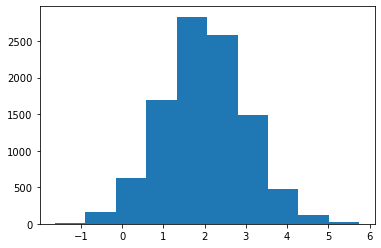

In [24]:
plt.hist(df_norm)
plt.plot()

# Расчет степеней свободы

In [25]:
def calc_df(sample, groups=1):
    """
    Расчет степеней свободы для выборки. По умолчанию - для одной группы,
    при наличии большего количества групп указать второй аргумент
    """
    return sample.size - groups

# T-критерий. Сравнение двух средних

In [26]:
def t_criteria(sample1, sample2, general_mean1, general_mean2):
    a = ((sample1.mean() - sample2.mean()) - (general_mean1 - general_mean2))
    b = (sample1.std() ** 2 / sample1.size + sample2.std() ** 2 / sample2.size) ** 0.5
    return a / b

In [27]:
a = (89.9 - 80.7) - (0 - 0)
b = (11.3 ** 2 / 20 + 11.7 ** 2 / 20) ** 0.5
a / b

2.529439633102561

In [28]:
def t_criteria_test(sample1_mean, sample2_mean, general_mean1, general_mean2, sd1, sd2, size1, size2):
    a = ((sample1_mean - sample2_mean) - (general_mean1 - general_mean2))
    b = (sd1 ** 2 / size1 + sd2 ** 2 / size2) ** 0.5
    return a / b

In [29]:
t_criteria_test(89.9, 80.7, 0, 0, 11.3, 11.7, 20, 20)

2.529439633102561

# One-way ANOVA

## Prepare data

In [30]:
df_a = pd.DataFrame(stats.norm(loc=99.7, scale=4.1).rvs(size=15))

In [31]:
df_a['group'] = 'a'

In [32]:
df_b = pd.DataFrame(stats.norm(loc=98.8, scale=5.8).rvs(size=15))

In [33]:
df_b['group'] = 'b'

In [34]:
df_c = pd.DataFrame(stats.norm(loc=94.4, scale=5.1).rvs(size=15))
df_c['group'] = 'c'

In [35]:
df_d = pd.DataFrame(stats.norm(loc=92.3, scale=3.8).rvs(size=15))
df_d['group'] = 'd'

In [36]:
df_test = pd.concat([df_a, df_b, df_c, df_d], ignore_index=True)
df_test.head()

,0,group
0,97.793770,a
1,105.727899,a
2,98.733219,a
3,104.258487,a
4,110.711235,a


In [37]:
df_test.tail()

,0,group
55,88.891091,d
56,94.637344,d
57,87.732082,d
58,94.686545,d
59,94.828021,d


# Algorithm

In [38]:
def one_way_anova(df, group):
    """
    Аргументы: df - выборка с разделением на группы, 
    group - столбец, определяющий группу
    
    Производится сравнение нескольких групп между собой.
    H0 - средние в группах не отличаются
    H1 - хотя бы одно среднее значительно отличается
    
    Вывод: f-value, p-value(т.е. P(>f))
    """
    df_bg = len(df[group].unique()) - 1
    df_wg = len(df[group]) - df_bg - 1
    
    # Вычисляем размеры и количество групп
    group_sizes = []
    groups = df[group].unique()
    for gr in groups:
        group_sizes.append(len(df[df[group] == gr]))
    group_amount = len(group_sizes)
    
    # Вычисляем среднее значение в группах
    means = []
    for gr in df[group].unique():
        means.append(df[df[group] == gr].mean())
    average = sum(means) / len(means)
    
    # Вычисляем межгрупповую сумму квадратов 
    ssb = 0
    for i in range(group_amount):
        ssb += (means[i][0] - average) ** 2 * 15
    
    # Вычисляем межгрупповой средний квадрат    
    ms_bg = ssb / a
    
    # Вычисляем групповые дисперсии
    variances = []
    for gr in df[group].unique():
        variances.append(df[df[group] == gr].var())
    # Вычисляем внутригрупповую сумму квадратов
    ssw = 0
    for i in range(group_amount):
        ssw += variances[i] * (group_size[i] - 1)
    
    # Вычисляем внутригрупповой средний квадрат
    ms_wg = ssw / b
    
    # Вычисляем f-value
    f_value = ms_bg / ms_wg
    
    # Вычисляем p-value для соответствующего f-value
    p_value = round(1 - stats.f.cdf(f_value, df_bg, df_wg)[0], 5)
    return f_value[0], p_value

In [39]:
f, p = one_way_anova(df_test, 'group')

NameError: name 'group_size' is not defined

In [40]:
print(f, p)

NameError: name 'f' is not defined

# Two-way ANOVA

# Generate data

In [41]:
df_a = pd.DataFrame(stats.norm(loc=104.8, scale=5.8).rvs(size=16))
df_a['group1'] = 'y'
df_a['group2'] = 'high'

In [42]:
df_b = pd.DataFrame(stats.norm(loc=105.5, scale=4.4).rvs(size=16))
df_b['group1'] = 'y'
df_b['group2'] = 'low'

In [43]:
df_c = pd.DataFrame(stats.norm(loc=101, scale=5.1).rvs(size=16))
df_c['group1'] = 'o'
df_c['group2'] = 'high'

In [44]:
df_d = pd.DataFrame(stats.norm(loc=102.3, scale=5.1).rvs(size=16))
df_d['group1'] = 'o'
df_d['group2'] = 'low'

In [45]:
df_test = pd.concat([df_a, df_b, df_c, df_d], ignore_index=True)
df_test

,0,group1,group2
0,108.963982,y,high
1,106.898368,y,high
2,110.246601,y,high
3,103.278662,y,high
4,98.224078,y,high
...,...,...,...
59,106.112093,o,low
60,100.091102,o,low
61,105.821289,o,low
62,102.263683,o,low


In [46]:
groups = ['group1', 'group2']
groups_amount = len(groups)
df_first = len(df_test[groups[0]].unique()) - 1
df_first
df_second = len(df_test[groups[1]].unique()) - 1
df_second

1

In [74]:
metki = []
dictt = {}
for gr in groups:
    dictt[gr] = df_test[gr].unique()
    metki.append(df_test[gr].unique())
average1 = []
average2 = []
group_sizes1 = []
group_sizes2 = []

group_values = []
for gr in dictt.keys():
    group_values.append(len(dictt[gr])) # metki
for gr in dictt.keys():
    for val in dictt[gr]:
        average1.append(df_test[df_test[gr] == val].mean())

In [65]:
ave1 = []
a = 0
b = 0
for i in range(len(groups)):
    b += group_values[i]
    ave1.append(sum(average1[a:b]) / len(average1[a:b]))
    a = b

2

[0, 0, 32, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [48]:
group_values

[2, 2]

In [49]:
len(dictt['group1'])

2

In [50]:
average1

[0    105.217892
 dtype: float64,
 0    101.256168
 dtype: float64,
 0    102.427474
 dtype: float64,
 0    104.046586
 dtype: float64]

In [89]:
df_test[df_test['group2'] == 'high'].mean()
df_test[df_test['group2'] == 'low'].mean()

0    104.046586
dtype: float64

In [83]:
dictt['group1']

array(['y', 'o'], dtype=object)

In [76]:
dictt['group1'][1]

'o'

In [47]:
print(group_sizes1, '\n',group_sizes2, '\n', average1, '\n', average2, '\n', average_global1, '\n', average_global2)

[32, 32] 
 [32, 32] 
 [0    105.217892
dtype: float64, 0    101.256168
dtype: float64] 
 [0    102.427474
dtype: float64, 0    104.046586
dtype: float64] 
 0    103.23703
dtype: float64 
 0    103.23703
dtype: float64


In [48]:
ssb1 = 0
ssb1 = group_sizes1[0] * (average1[0][0] - average_global1[0]) ** 2
ssb1 += group_sizes1[1] * (average1[1][0] - average_global1[0]) ** 2
ms_bg1 = ssb1 / df_first

ssb2 = 0
ssb2 = group_sizes2[0] * (average2[0][0] - average_global2[0]) ** 2
ssb2 += group_sizes2[1] * (average2[1][0] - average_global2[0]) ** 2
ms_bg2 = ssb2 / df_second

In [49]:
def_global = len(df_test) - len(group_sizes1) - len(group_sizes2)

In [50]:
variances = []
group_sizes_global = []
for val in first_group:
    for gr in second_group:
        variances.append(df_test[(df_test['group1'] == val) & (df_test['group2'] == gr)].var())
        group_sizes_global.append(len(df_test[(df_test['group1'] == val) & (df_test['group2'] == gr)]))

In [51]:
variances = np.array(variances)

In [52]:
group_sizes_global

[16, 16, 16, 16]

In [53]:
ssw = 0
for i in range(len(group_sizes_global)):
    ssw += (group_sizes_global[i] - 1) * variances[i]
ssw = ssw[0]
ms_wg = ssw / def_global

In [54]:
ms_wg

20.628060183130668

In [55]:
f_first = ms_bg1 / ms_wg
f_second = ms_bg2 / ms_wg
p_value1 = round(1 - stats.f.cdf(f_first, df_first, def_global), 5)
p_value2 = round(1 - stats.f.cdf(f_second, df_second, def_global), 5)

In [56]:
p_value1

0.00091

In [57]:
p_value2

0.15906

In [78]:
a = np.array([1, 2, 3])

In [91]:
groups = ['group1', 'group2']
n_global = len(groups)
n_local = 0
for gr in groups:
    n_local += len(df_test[gr].unique())
metki = n_local / n_global

In [103]:
average_local = []
for gr in groups:
    for val in df_test[gr].unique():
        average_local.append(df_test[df_test[gr] == val].mean()[0])

In [104]:
average_local

[105.21789226215701,
 101.25616789534841,
 102.42747423363681,
 104.04658592386859]

In [102]:
average_global = []
for i in range(0, n_local, metki):
    

0    105.217892
dtype: float64